<a href="https://colab.research.google.com/github/AryanPatil-IT/AI-Internship-Project/blob/main/Sentiment_Analysis_on_Twitter_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Dataset size: 30
Sentiment
Positive    10
Negative    10
Neutral     10
Name: count, dtype: int64

Accuracy: 0.4444444444444444

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.33      0.50         3
     Neutral       0.33      0.33      0.33         3
    Positive       0.40      0.67      0.50         3

    accuracy                           0.44         9
   macro avg       0.58      0.44      0.44         9
weighted avg       0.58      0.44      0.44         9



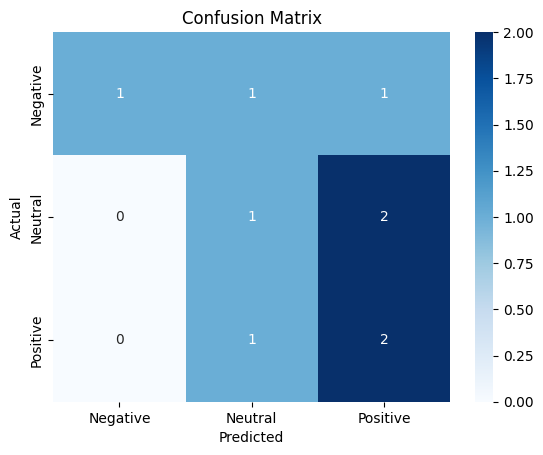


Custom Review Sentiment: Positive


In [ ]:
# STEP 1: Install necessary libraries
!pip install pandas nltk scikit-learn matplotlib seaborn

# STEP 2: Import libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Download NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')

# STEP 3: Create a larger, balanced dataset
reviews = [
    # Positive
    "This movie was fantastic, I loved it!",
    "Amazing visuals and wonderful soundtrack.",
    "Really good movie, I will watch again!",
    "Excellent direction and superb acting!",
    "Brilliant film, outstanding performances!",
    "The actors did an amazing job.",
    "Pretty good movie overall.",
    "Loved every part of it!",
    "Best movie I have seen this year!",
    "Absolutely wonderful experience, I enjoyed it.",

    # Negative
    "Absolutely terrible film. Waste of time.",
    "The plot was boring and predictable.",
    "I hate this movie, very bad experience.",
    "Worst movie ever, do not recommend.",
    "Terrible script, I walked out halfway.",
    "This was a complete disaster.",
    "The movie was too long and boring.",
    "Not worth watching, very poor film.",
    "Horrible acting and weak story.",
    "Disappointing and frustrating experience.",

    # Neutral
    "It was okay, not too bad.",
    "Mediocre at best, expected more.",
    "The movie was average, nothing special.",
    "Just a normal film, nothing exciting.",
    "Not too bad, not too good either.",
    "It’s fine, but I wouldn’t watch it again.",
    "Decent movie, nothing remarkable.",
    "An average film, okay for passing time.",
    "Neither great nor terrible.",
    "A standard movie, nothing much to say."
]

sentiments = (
    ["Positive"] * 10 +
    ["Negative"] * 10 +
    ["Neutral"] * 10
)

df = pd.DataFrame({"Review": reviews, "Sentiment": sentiments})
print("Dataset size:", len(df))
print(df['Sentiment'].value_counts())

# STEP 4: Preprocess text
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = re.sub(r"[^a-zA-Z ]", "", text)
    tokens = word_tokenize(text.lower())
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df["Cleaned_Review"] = df["Review"].apply(preprocess)

# STEP 5: Convert text to numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Cleaned_Review"])
y = df["Sentiment"]

# STEP 6: Train-Test Split (with stratify to balance classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# STEP 7: Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# STEP 8: Predict
y_pred = model.predict(X_test)

# STEP 9: Evaluate
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# STEP 10: Test custom review
sample = ["The movie was really amazing and I loved it!"]
sample_vector = vectorizer.transform([preprocess(sample[0])])
print("\nCustom Review Sentiment:", model.predict(sample_vector)[0])
